# Likningar

In [2]:
from sympy import solve, symbols

## Eksamen ELE141 2018:

![title](krets_eksamen_v2018.png)

### Matlabkode frå LF

### Løysing i Python med sympy

In [96]:
VR1, V1, Vab = symbols('V_R1 V_1 V_ab')
R1=300; R2=200; R3=400; R4=600; I1=100E-3

In [99]:
Likn1 = I1 - VR1/R1 - ((VR1 - V1)/R2)
Likn2 = ((100*VR1)/R1) - V1
Likn3 = V1*(R4/(R3 + R4)) - Vab

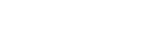

In [100]:
Likn1

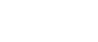

In [101]:
Likn2

In [102]:
Likn3

In [106]:
svar = solve([Likn1, Likn2, Likn3], [V1, Vab, VR1], dict=True)

In [107]:
svar

### Løysing i Python med numpy

In [88]:
import numpy as np

Setter likningane opp på matriseform:

$$
\begin{bmatrix}
\frac{1}{200} & -\frac{1}{120} \\
-1 & \frac{1}{3}
\end{bmatrix}
\begin{bmatrix}
V_1 \\
V_{R1}
\end{bmatrix}
=
\begin{bmatrix}
-0.1 \\
0
\end{bmatrix}
$$

In [90]:
A = np.array([[1/200, -1/120], [-1, 1/3]])
A

array([[ 0.005     , -0.00833333],
       [-1.        ,  0.33333333]])

In [92]:
B = np.array([[-0.1], [0]])
B

array([[-0.1],
       [ 0. ]])

In [93]:
A_inv = np.linalg.inv(A)
A_inv

array([[ -50.  ,   -1.25],
       [-150.  ,   -0.75]])

In [94]:
X = np.matmul(A_inv, B)
X

array([[ 5.],
       [15.]])

### Løysing i Python med lcapy

In [65]:
from lcapy import Circuit

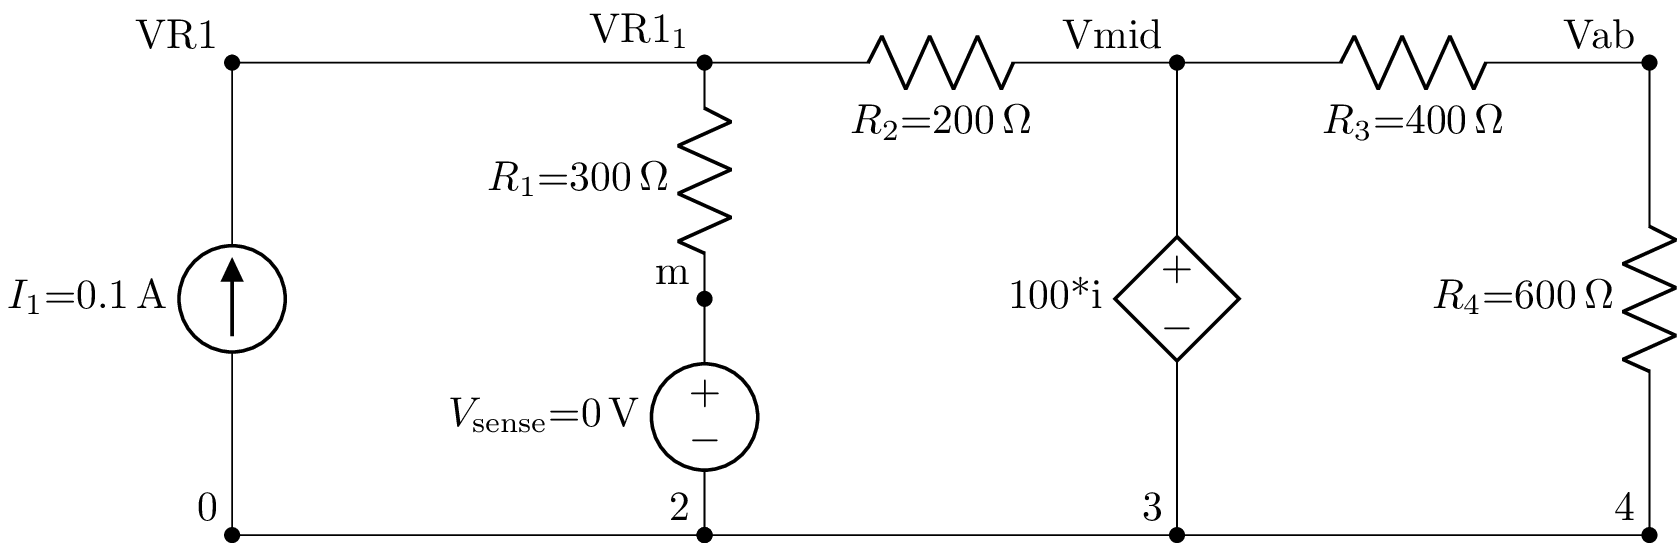

In [166]:
c = Circuit("""
I1 VR1 0 DC 100e-3; down=2
W 0 0_1; right=2
W VR1 VR1_1; right=2
R1 VR1_1 m 300; down
Vsense m 2 0; down
R2 VR1_1 Vmid 200; right=2
R3 Vmid Vab 400; right=2
R4 Vab 4 600; down=2
H1 Vmid 3 Vsense 100; down=2, l=100*i
W 2 3
W 3 4
""")
c.draw()

In [167]:
c.Vab.V

ValueError: The MNA A matrix is not invertible for time analysis:
    Check voltage source is not short-circuited.
    Check for loop of voltage sources.
    Check current source is not open-circuited.